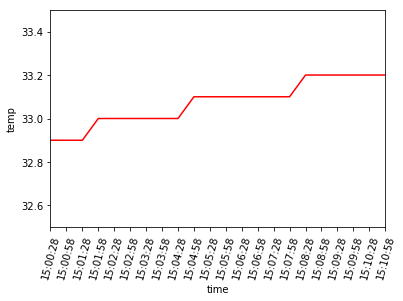

In [12]:
import os 
import numpy as np
import re
import matplotlib as mpl 
import matplotlib.pyplot as plt

f = open('log2.txt', 'r') 

arr_time_first_10 = list()
arr_value_first_10 = list()
arr_time_interval_5 = list()
arr_value_interval_5 = list()
value_for_mean = list()
check = 1

for string in f: 
    result = re.search(r'(\d+:(\d+):\d+).*00603517B1F7 <<<.*ALIVE-.*temperature=(\d+)', string)
    if result is not None:
        time = result.group(1)
        time_min = (int)(result.group(2))
        value = (int)(result.group(3)) / 10
        
        if time_min <= 10:
            arr_time_first_10.append(time)
            arr_value_first_10.append(value)
        
        if (time_min % 5 == 0 and time_min != 0 and time_min != 59):
            if check == 0:
                check = 1
                arr_value_interval_5.append(round(np.mean(value_for_mean), 2))
                value_for_mean.clear()
        elif (time_min % 5 == 1):
            check = 0  
            
        value_for_mean += [value]

arr_value_interval_5.append(round(np.mean(value_for_mean), 2))

#1
plt.axis([0, len(arr_time_first_10) - 1, 32.5, 33.5])

plt.xlabel('time')
plt.ylabel('temp')

plt.xticks(rotation=75)

plt.plot(arr_time_first_10, arr_value_first_10, color = 'red')

[32.98, 33.14, 33.23, 32.91, 32.87, 33.04, 33.18, 33.31, 33.44, 33.54, 33.64, 33.7]


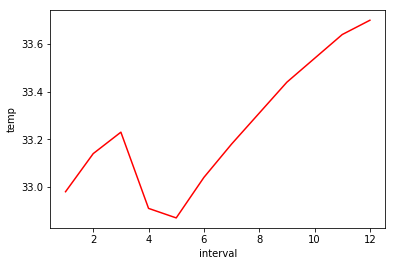

In [13]:
#2
print(arr_value_interval_5)
#plt.axis([1, 12, 32, 34])

plt.xlabel('interval')
plt.ylabel('temp')
plt.plot(range(1, 13), arr_value_interval_5, color = 'red')